In [11]:
import numpy as np
import matplotlib.pyplot as plt

import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import functional as SF
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm 
import psweep as ps # <--
import pandas as pd

import warnings # highly illegal move to make pandas compliant
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
import sys
sys.path.append('../code/utils')  # Add the utils directory to the Python path

import utils_data, utils_spikes, utils_events, utils_tensor

# We've also got binary replay files from cortical labs that could use some reverse engineering

In [13]:
# Experiment specific parameters 
chip_id = 9501 # experiment ID
chip_session = 0 # 2 for post-training, 0 for pre-training

# Stable parameters
data_path = '../data/cortical_labs_data/' # path to data
fs = 20000 # sampling frequency
binsize = 10 # ms, bin size for spike counts
array_size = 1024 # number of electrode in the array

# Torch parameters 
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
len_trial = 100 # how long in bins is a trial (so in ms it's len_trial*binsize)

In [14]:
filename = data_path + '9501.2021-06-01.0.replay.bin'

In [15]:
lines = []
with open(filename, mode='rb') as file: 
    while True:
        byte = file.read(8)
        if not byte:
            break
        i = int.from_bytes(byte, byteorder='little')
        lines.append(i)

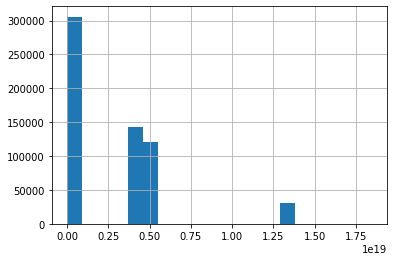

count    6.000150e+05
mean     2.771043e+18
std      3.430268e+18
min      0.000000e+00
25%      1.133892e+09
50%      1.829611e+16
75%      4.724276e+18
max      1.844196e+19
Name: values, dtype: float64


In [16]:
# convert the list to a pandas DataFrame
df = pd.DataFrame(lines, columns=['values'])

# plot a histogram of the values
df['values'].hist(bins=20)
plt.show()

# print out some summary statistics
print(df['values'].describe())
